### Embeddings

Think of embeddings as a way to translate words into langugae that computer can understand - numbers.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

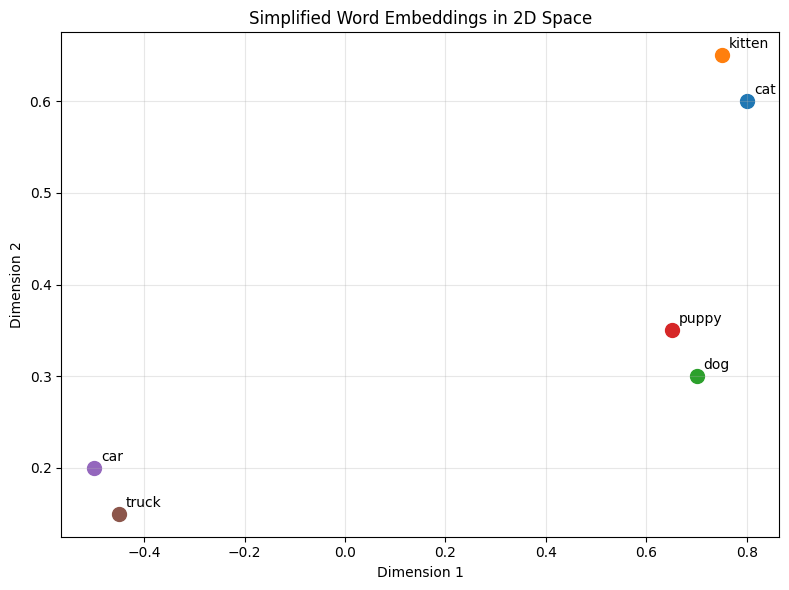

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Measuring Similarity

In [11]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product = np.dot(vec1, vec2)
    magnitude = np.linalg.norm(vec1) * np.linalg.norm(vec2)
    return dot_product / magnitude
    

In [15]:
print("cosine similarity between Cat and Dog:", cosine_similarity(word_embeddings['cat'], word_embeddings['dog']))
print("cosine similarity between Cat and Cat:", cosine_similarity(word_embeddings['cat'], word_embeddings['cat']))
print("cosine similarity between Cat and Cat:", cosine_similarity(word_embeddings['cat'], word_embeddings['kitten']))

cosine similarity between Cat and Dog: 0.971667603161947
cosine similarity between Cat and Cat: 1.0
cosine similarity between Cat and Cat: 0.9975095892825593


### Creating first embedding

In [16]:
from langchain_huggingface import HuggingFaceEmbeddings

# Initialize a simple embedding model
embedding_model = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2",
)

embedding_model

e:\RAG\learn_RAG\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
e:\RAG\learn_RAG\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\iabhi\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mod

HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [19]:
# Create your first embedding
text = "Hello I am learning RAG"

embedding = embedding_model.embed_query(text)
print("Text: ", text)
print("Embedding: ", embedding)
print()
print("Embedding shape: ", len(embedding))

Text:  Hello I am learning RAG
Embedding:  [-0.022407282143831253, 0.0396270751953125, 0.03496512025594711, -0.006364477798342705, -0.13566690683364868, -0.014265269972383976, 0.04009977728128433, 0.018527846783399582, -0.041267648339271545, 0.01505004521459341, -0.001318687223829329, -0.0058855824172496796, 0.01583467237651348, -0.03385549038648605, -0.029181839898228645, 0.04190610349178314, 0.03506595268845558, 0.10595035552978516, -0.024145126342773438, -0.04088587686419487, -0.06464455276727676, 0.01052786223590374, -0.004285508766770363, -0.035949595272541046, 0.009206303395330906, 0.03464619442820549, 0.010237290523946285, 0.03068765066564083, 0.11283392459154129, -0.08004500716924667, -0.04780895262956619, 0.03915790468454361, 0.011918982490897179, -0.010854538530111313, -0.0799119770526886, 0.03083883784711361, -0.011894812807440758, 0.022835003212094307, 0.0013822067994624376, 0.050368718802928925, -0.009570717811584473, 0.03395761176943779, 0.012621923349797726, -0.117672719

In [20]:
sentences = [
    "Hello I am learning RAG",
    "I love coding",
    "Cat sat on the mat",
]

In [21]:
embedding_sentences = embedding_model.embed_documents(sentences)
print(embedding_sentences)

[[-0.02240733429789543, 0.03962704911828041, 0.03496510535478592, -0.0063644880428910255, -0.13566690683364868, -0.014265263453125954, 0.040099747478961945, 0.01852787286043167, -0.04126760736107826, 0.0150500712916255, -0.0013187279691919684, -0.005885561928153038, 0.01583467423915863, -0.03385544568300247, -0.02918182872235775, 0.04190606251358986, 0.035065945237874985, 0.10595037043094635, -0.024145126342773438, -0.040885910391807556, -0.06464456021785736, 0.01052781566977501, -0.004285524599254131, -0.03594961762428284, 0.009206317365169525, 0.03464622050523758, 0.01023727748543024, 0.03068762831389904, 0.11283387988805771, -0.08004499226808548, -0.04780900850892067, 0.039157915860414505, 0.011918938718736172, -0.010854576714336872, -0.0799119770526886, 0.03083883784711361, -0.011894789524376392, 0.022835001349449158, 0.0013821887550875545, 0.05036874860525131, -0.009570710361003876, 0.033957574516534805, 0.01262193825095892, -0.11767274141311646, 0.05967223271727562, 0.02682592347

### Open AI Embeddings

In [23]:
import os
import dotenv

dotenv.load_dotenv()

True

In [24]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

In [26]:
# Single text embedding

text = "RAG is a technique for building AI applications that use large language models to answer questions."
text

'RAG is a technique for building AI applications that use large language models to answer questions.'

In [28]:
single_text_embedding = embeddings.embed_query(text)
print("length of embedding: ", len(single_text_embedding))
print("embedding: ", single_text_embedding)


length of embedding:  1536
embedding:  [0.0014290987746790051, -0.0057425121776759624, 0.028049837797880173, 0.014024918898940086, -0.00938912108540535, -0.030896607786417007, -0.012621120549738407, 0.01403797697275877, -0.011615609750151634, 0.030243679881095886, -0.016897806897759438, -0.03687743842601776, -0.027214087545871735, 0.004270156845450401, -0.029407929629087448, -0.04288438707590103, -0.027945369482040405, -0.021141845732927322, 0.011700490489602089, 0.01251012273132801, -0.015866179019212723, -0.012444830499589443, -0.0016323229065164924, -0.00786126684397459, 0.018752126023173332, -0.0177727323025465, 0.030844373628497124, 0.053226787596940994, -0.019470347091555595, -0.03348220884799957, 0.03045261651277542, -0.03141895309090614, 0.005282197147607803, 0.008546843193471432, 0.03933245316147804, -0.0037641366943717003, -0.0006631311844103038, -0.0068818735890090466, -0.0038196356035768986, 0.017093686386942863, -0.001259337179362774, -0.014024918898940086, 0.0017727026715

In [29]:
# Multiple text embedding

multiple_text_embedding = embeddings.embed_documents(sentences)
print("length of embedding: ", len(multiple_text_embedding))
print("embedding: ", multiple_text_embedding)

length of embedding:  3
embedding:  [[-0.022842396050691605, -0.025416187942028046, 0.002204539952799678, 0.0025262637063860893, -0.02057570591568947, -0.0329328291118145, -0.01130420807749033, 0.0007768900832161307, -0.0033890686463564634, -0.004997688345611095, 0.02456800639629364, -0.015764471143484116, -0.0395427905023098, 0.0024787364527583122, 0.04232131689786911, -0.0011370014399290085, -0.0031642275862395763, 0.009410424157977104, -0.03591608628630638, 0.10277616232633591, 0.005410810932517052, -0.048755794763565063, 0.021438511088490486, 0.011735609732568264, -0.0022648631129413843, -0.03895783796906471, 0.050656888633966446, 0.05475155636668205, -0.01373907271772623, -0.02815083973109722, 0.011779481545090675, -0.044778116047382355, -0.0461527556180954, -0.02665921114385128, 0.019405800849199295, 0.033634770661592484, -0.027726750820875168, 0.015311132185161114, -0.04103441908955574, 0.006906095892190933, -0.002316046506166458, -0.027887612581253052, 0.012905514799058437, 0.0